In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from prophet import Prophet
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
# Import Meta Movie Data
meta_data = pd.read_csv(
    Path("movies_data/movies_metadata.csv"),
    index_col="title")

# Display data
meta_data.head()
meta_data.tail(10)

C:\Users\vicky\AppData\Local\Temp\ipykernel_16364\921304640.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data = pd.read_csv(


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
House of Horrors,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,84419,tt0038621,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1946-03-29,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Meet...The CREEPER!,False,6.3,8.0
Shadow of the Blair Witch,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",NaN,390959,tt0265736,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",...,[],2000-10-22,0.0,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.0,2.0
The Burkittsville 7,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,289923,tt0252966,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-10-03,0.0,30.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Do you know what happened 50 years before ""The...",False,7.0,1.0
Caged Heat 3000,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,3.5,1.0
Robin Hood,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,5.7,26.0
Subdue,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0
Century of Birthing,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0
Betrayal,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,False,3.8,6.0
Satan Triumphant,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,False,0.0,0.0


In [4]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
# Drop null values
meta_data.dropna(axis=0, inplace=True)

meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
GoldenEye,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,False,6.6,1194.0
Friday,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,False,7.0,513.0
From Dusk Till Dawn,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,False,6.9,1644.0
Blue in the Face,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,False,6.8,28.0
Mighty Morphin Power Rangers: The Movie,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,False,5.2,153.0


In [6]:
meta_data.drop(['adult', 'belongs_to_collection', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'status', 'tagline', 'video' ], axis=1)

,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
title,,,,,,,,,,,
GoldenEye,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.6,1194.0
Friday,3500000,"[{'id': 35, 'name': 'Comedy'}]",14.56965,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.0,513.0
From Dusk Till Dawn,19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",15.339153,"[{'name': 'A Band Apart', 'id': 59}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,1644.0
Blue in the Face,2000000,"[{'id': 35, 'name': 'Comedy'}]",11.528147,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.8,28.0
Mighty Morphin Power Rangers: The Movie,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7.024227,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.2,153.0
...,...,...,...,...,...,...,...,...,...,...,...
War for the Planet of the Apes,152000000,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",146.161786,"[{'name': 'Chernin Entertainment', 'id': 7076}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2017-07-11,369907963.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.7,1675.0
Goon: Last of the Enforcers,0,"[{'id': 35, 'name': 'Comedy'}]",6.365691,"[{'name': 'Caramel Film', 'id': 23108}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2017-03-17,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.0,35.0
Pokémon: Spell of the Unknown,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.480376,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.0,144.0


In [18]:
meta_data_scaled = StandardScaler().fit_transform(meta_data[["vote_count", "vote_average"]])

meta_data_scaled[0:5]

array([[-0.22467792,  0.32523252],
       [-0.53230953,  0.7206468 ],
       [-0.02139712,  0.62179323],
       [-0.75140105,  0.52293966],
       [-0.69493416, -1.05871745]])

In [19]:
meta_data_scaled_df = pd.DataFrame(
    meta_data_scaled,
    columns=["revenue", "vote_average"]
)

# Create a Column for Genre
meta_data_scaled_df['title'] = meta_data.index

# Put Genres as index
meta_data_scaled_df = meta_data_scaled_df.set_index('title')

# Preview Dataframe
meta_data_scaled_df.head()
meta_data_scaled_df.tail(10)

,revenue,vote_average
title,,
Cars 3,-0.439704,0.325233
"Monster High: Boo York, Boo York",-0.756370,1.017208
Monster High: 13 Wishes,-0.755015,0.127525
Despicable Me 3,0.140324,-0.070182
Little Forest: Summer/Autumn,-0.756822,2.005743
War for the Planet of the Apes,-0.007393,0.424086
Goon: Last of the Enforcers,-0.748239,-0.267889
Pokémon: Spell of the Unknown,-0.699000,-0.267889
Transformers: The Last Knight,-0.113551,-0.070182


In [20]:
# Encode (convert to dummy variables) the EnergyType column
df_genres = pd.get_dummies(meta_data["genres"])

df_genres.head()

,"[{'id': 10402, 'name': 'Music'}]","[{'id': 10749, 'name': 'Romance'}, {'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10402, 'name': 'Music'}]","[{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}]","[{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}]","[{'id': 10749, 'name': 'Romance'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}]","[{'id': 10751, 'name': 'Family'}, {'id': 10402, 'name': 'Music'}, {'id': 10770, 'name': 'TV Movie'}]","[{'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 10749, 'name': 'Romance'}]","[{'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10402, 'name': 'Music'}, {'id': 16, 'name': 'Animation'}]","[{'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 12, 'name': 'Adventure'}]","[{'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 16, 'name': 'Animation'}, {'id': 10749, 'name': 'Romance'}]",...,"[{'id': 878, 'name': 'Science Fiction'}]","[{'id': 9648, 'name': 'Mystery'}, {'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]","[{'id': 9648, 'name': 'Mystery'}, {'id': 27, 'name': 'Horror'}]","[{'id': 9648, 'name': 'Mystery'}, {'id': 35, 'name': 'Comedy'}, {'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 14, 'name': 'Fantasy'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 10752, 'name': 'War'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 12, 'name': 'Adventure'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 35, 'name': 'Comedy'}, {'id': 10770, 'name': 'TV Movie'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 35, 'name': 'Comedy'}]","[{'id': 99, 'name': 'Documentary'}, {'id': 36, 'name': 'History'}, {'id': 10752, 'name': 'War'}]","[{'id': 99, 'name': 'Documentary'}]"
title,,,,,,,,,,,,,,,,,,,,,
GoldenEye,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Friday,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
From Dusk Till Dawn,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Blue in the Face,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Mighty Morphin Power Rangers: The Movie,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=4)

In [22]:
# Fit the model for the df_stocks_scaled DataFrame
model.fit(meta_data_scaled_df)

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
# Predict the Model Clusters
movie_clusters = model.predict(meta_data_scaled_df)

# View the Movie Clusters
print(movie_clusters)

[1 1 1 1 2 1 3 1 3 3 3 1 3 1 1 1 1 1 2 3 1 1 2 1 1 1 1 3 3 1 3 3 3 3 1 1 1
 1 3 1 2 2 1 2 1 3 1 1 1 1 1 2 1 1 1 2 2 1 3 1 3 1 1 2 1 1 1 1 1 2 2 2 1 2
 2 3 1 1 1 0 1 2 1 1 2 2 2 2 0 2 2 2 1 2 3 1 1 0 1 1 3 3 3 3 2 3 2 2 2 3 3
 2 3 2 2 2 1 2 2 3 2 1 3 3 2 1 0 3 1 2 2 1 3 2 1 1 2 1 2 2 1 3 1 2 1 2 3 2
 2 2 1 1 2 1 2 0 1 1 0 3 3 1 2 1 1 1 2 2 3 1 1 0 2 2 2 2 0 1 2 2 1 1 3 3 2
 2 2 2 2 0 3 2 2 1 2 1 0 2 2 2 1 2 2 3 2 2 1 2 3 1 1 2 1 2 3 3 1 0 2 1 2 2
 2 2 1 1 2 2 2 0 1 0 2 0 2 2 1 3 1 2 0 3 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2
 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 2 3 1 2 2 3 2 2 1 2 3 2 2 2 2 2 2 1 2 2 2 2
 3 3 2 1 0 1 1 1 1 3 0 2 2 3 2 2 3 2 2 3 2 1 2 3 2 2 1 2 2 2 1 2 1 0 2 1 2
 0 2 1 0 2 2 3 3 1 2 2 2 1 1 2 1 1 1 1 2 1 1 2 2 1 2 2 2 2 1 3 0 1 3 3 1 1
 3 0 2 2 2 2 3 3 2 2 0 2 2 3 2 2 2 2 2 0 2 1 3 2 0 2 2 1 2 2 2 2 3 3 2 3 3
 2 2 1 2 2 2 2 2 2 0 0 1 3 2 2 2 1 1 1 0 1 3 2 3 1 3 2 3 2 3 0 1 1 2 0 2 1
 1 2 2 0 0 3 2 3 2 1 1 2 2 2 2 0 2 2 2 2 1 1 1 3 3 2 3 2 1 3 2 3 3 0 1 1 1
 3 2 2 2 1 1 2 2 1 1 2 3 

In [24]:
# Create a Copy of the DataFrame
df_meta_scaled_predictions = meta_data_scaled_df.copy()

In [25]:
# Create a New Column in the DataFrame with the Clusters
df_meta_scaled_predictions["MovieCluster"] = movie_clusters

# Review the DataFrame
df_meta_scaled_predictions.head()
df_meta_scaled_predictions.tail()

,revenue,vote_average,MovieCluster
title,,,
War for the Planet of the Apes,-0.007393,0.424086,1
Goon: Last of the Enforcers,-0.748239,-0.267889,2
Pokémon: Spell of the Unknown,-0.699000,-0.267889,2
Transformers: The Last Knight,-0.113551,-0.070182,2
Bon Cop Bad Cop 2,-0.761791,0.522940,1


<Axes: xlabel='title'>

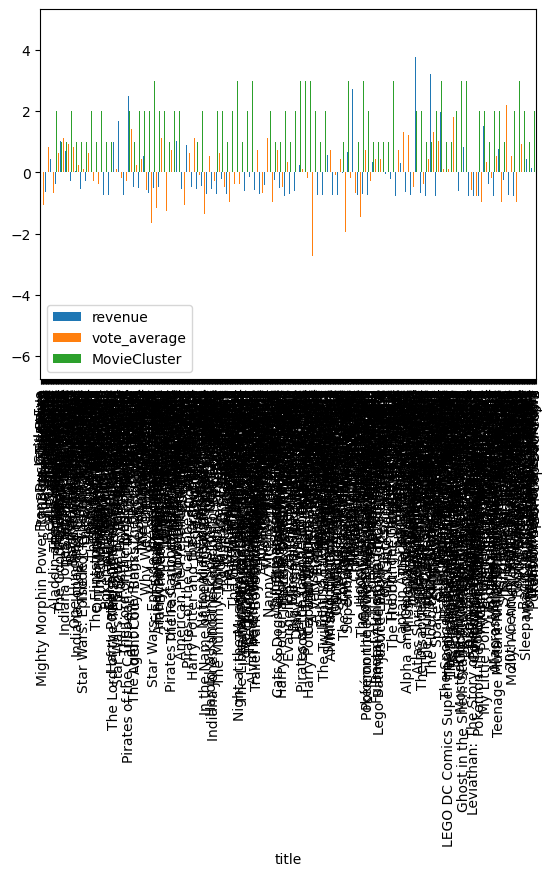

In [26]:
df_meta_scaled_predictions.plot.bar()